## Качественное сравнение алгоритмов

Проведем сравнение алгоритмов уменьшения размерности UMAP, t-SNE, SVD и PCA на основе пункта 5.1. Qualitative Comparison of Multiple Algorithms статьи UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction - https://arxiv.org/pdf/1802.03426.pdf.

Сравнение производится с использованием 4 датасетов: MNIST, F-MNIST, Shuttle и PenDigits. 

**MNIST**: набор данных,состоящий из 70000 черно-белых изображений рукописных цифр размера 28x28.  
**F-MNIST**: набор 70000 черно-белых изображений предметов моды (одежда, обувь и сумки) размера 28x28.  
**Pen digits**: набор 1797 черно-белых изображений рукописных цифр размера 8x8.  
**Shuttle**: набор данных NASA, состоящий из различных данных, связанных с положением излучателей в космическом корабле. Состоит из 58000 экземпляров, набор экземпляра содержит 9 атрибутов, каждый из которых является числовым.

### Библиотеки

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml, load_digits

from umap import UMAP
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

### Загрузка данных

In [5]:
mnist, mnist_labels = fetch_openml(data_id=554, return_X_y=True, as_frame=False)
f_mnist, f_mnist_labels = fetch_openml(data_id=40996, return_X_y=True, as_frame=False)
shuttle, shuttle_labels = fetch_openml(data_id=40685, return_X_y=True, as_frame=False)
pendigits, pendigits_labels = load_digits(return_X_y=True, as_frame=False)

C:\Users\sveta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Сравнение алгортимов

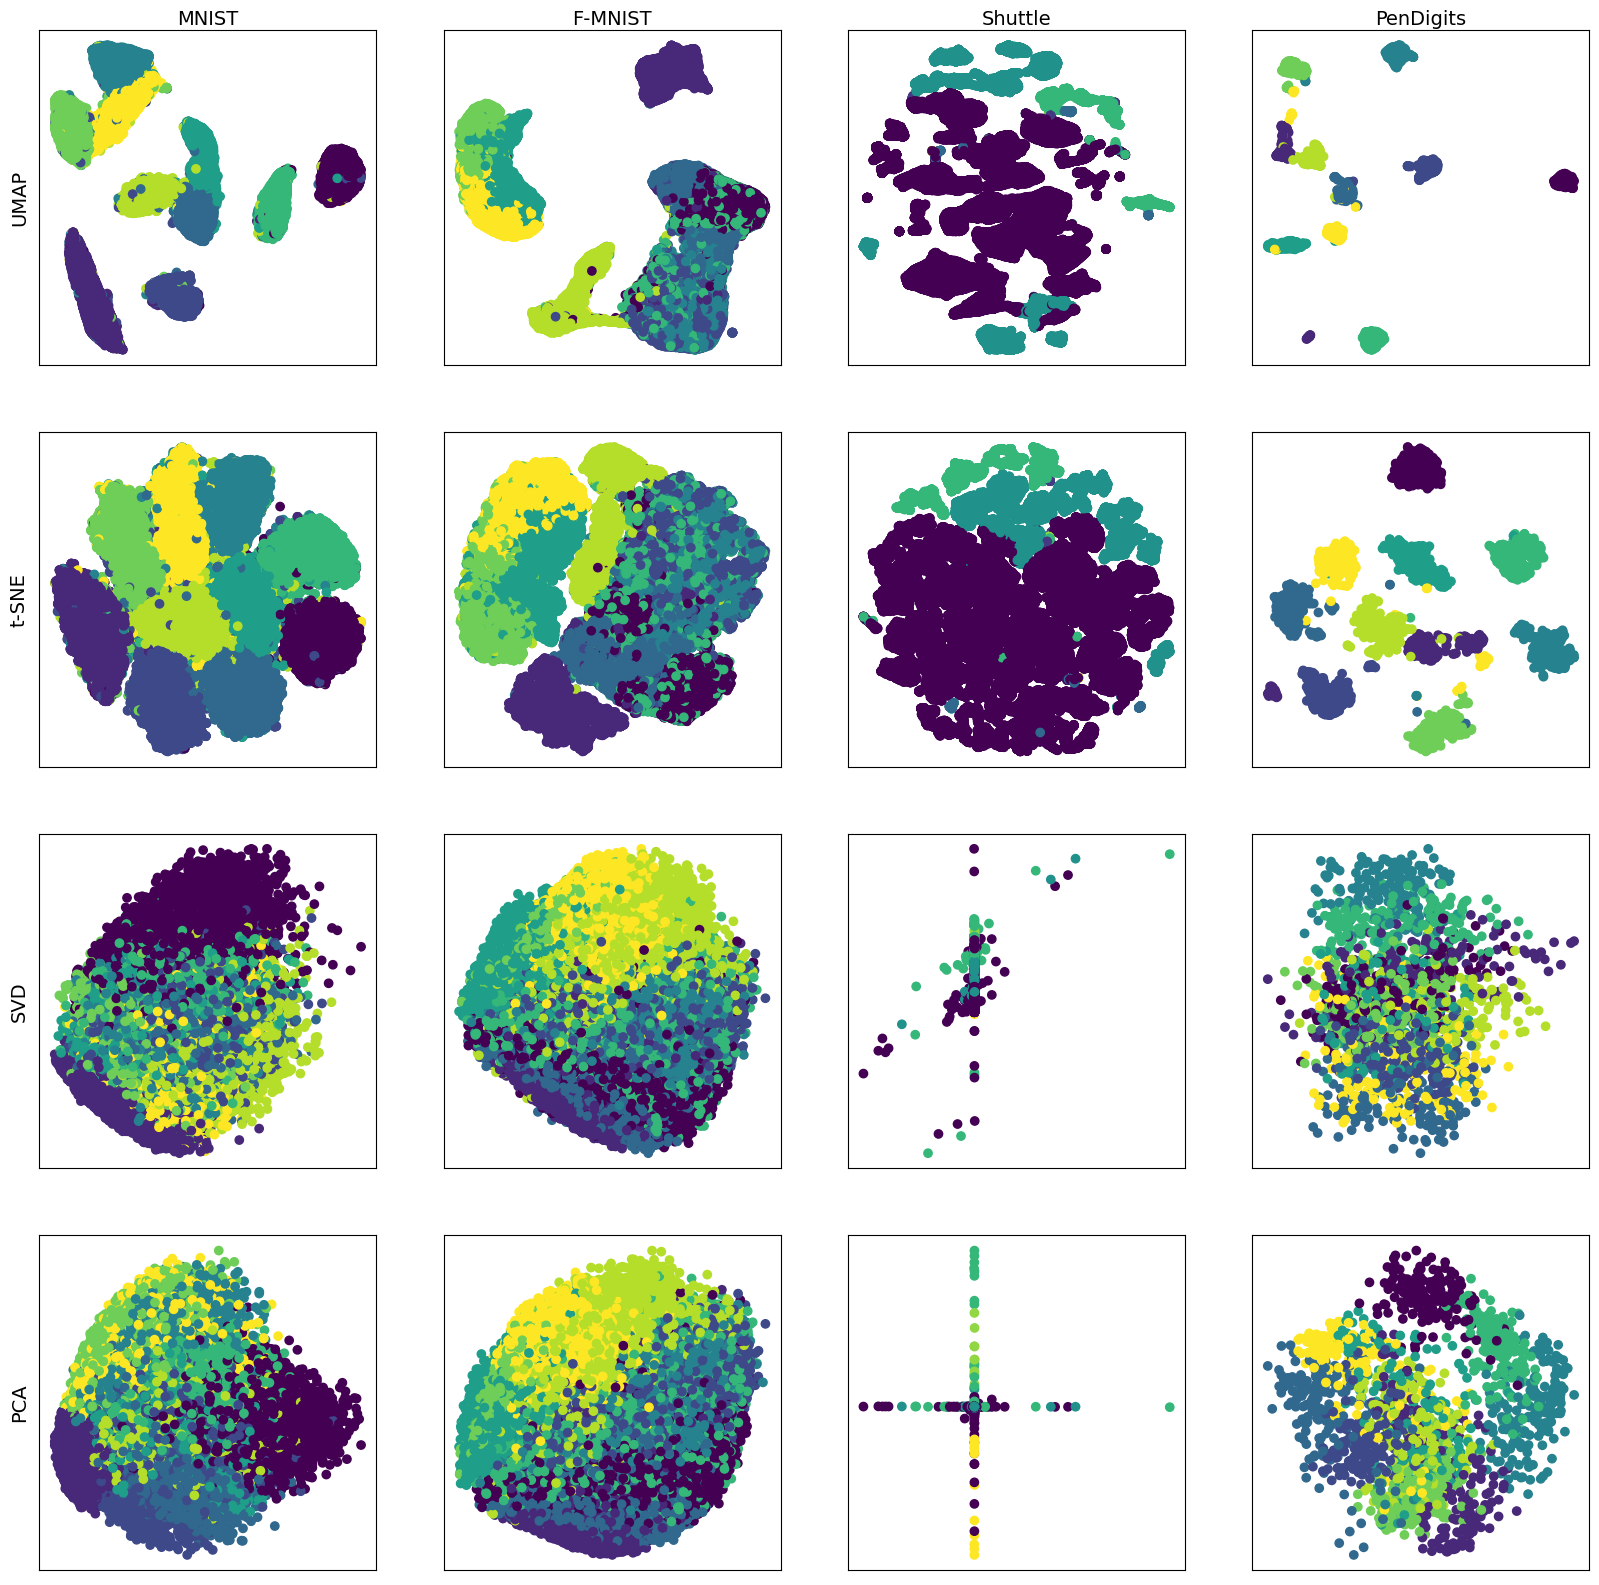

In [6]:
algorithms = [(UMAP(n_components=2), 'UMAP'), (TSNE(2), 't-SNE'),
              (TruncatedSVD(2), 'SVD'), (PCA(2), 'PCA')]

datasets = [[mnist, mnist_labels, 'MNIST'], [f_mnist, f_mnist_labels, 'F-MNIST'],
            [shuttle, shuttle_labels, 'Shuttle'], [pendigits, pendigits_labels, 'PenDigits']]

fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i in range(len(datasets)):
    axs[0, i].set_xlabel(datasets[i][2], fontsize=14)
    axs[0, i].xaxis.set_label_position('top')

for i in range(len(algorithms)):
    axs[i, 0].set_ylabel(algorithms[i][1], fontsize=14)

for i, alg in enumerate(algorithms):
    for j, dataset in enumerate(datasets):
        embeddings = alg[0].fit_transform(X=dataset[0])
        axs[i, j].scatter(embeddings[:, 0], embeddings[:, 1], c=dataset[1].astype(int))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.show()